In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

In [ ]:
# We'll define a function to draw a nice plot of an SVM

def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
    Z=svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv=svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1') 
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max) 
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [ ]:
np.random.seed(5)
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] +1

Testing wether the data is linear or non-linear

Text(0, 0.5, 'X2')

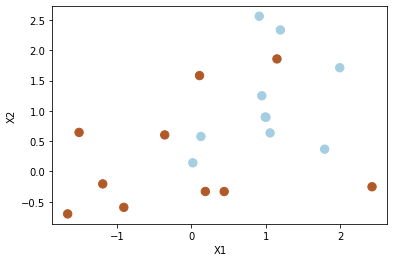

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

Clearly the data is not linearly seperable

In [ ]:
svc = SVC(C=1, kernel='linear', probability=True) 
svc.fit(X, y)

SVC(C=1, kernel='linear', probability=True)

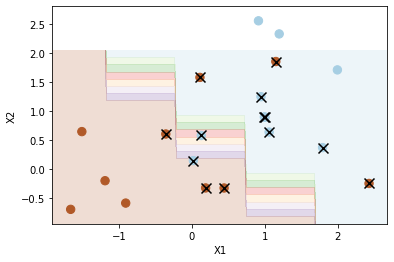

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

Using a smaller cost

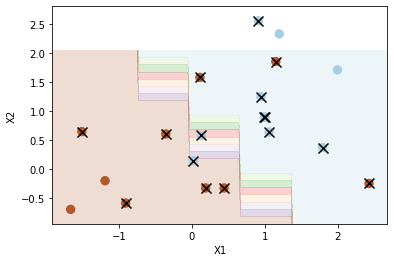

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear', probability=True) 
svc2.fit(X, y)
plot_svc(svc2, X, y)

Cost reduction leads to wider margin and more number of support vectors

In [ ]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10)
scoring = clf.fit(X, y)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00116172, 0.00070658, 0.00071342, 0.00079772, 0.00061936,
        0.00066161, 0.00079846]),
 'mean_score_time': array([0.00129724, 0.00035436, 0.00038383, 0.0004148 , 0.00034714,
        0.00035508, 0.00036435]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

In [ ]:
clf.best_estimator_

SVC(C=0.001, kernel='linear')

Best parameter value is 0.001

Using a randomly generated test dataset to test model predictions

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

In [ ]:
svc2 = SVC(C=0.001, kernel='linear', probability=True)
svc2.fit(X, y)
y_pred = svc2.predict(X_test)

In [ ]:
without_kernel = confusion_matrix(y_test, y_pred)
pd.DataFrame(without_kernel, index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


With this value of c, 14 of the test observations are correctly classified

## Generating Linearly Seperable data

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1

Text(0, 0.5, 'X2')

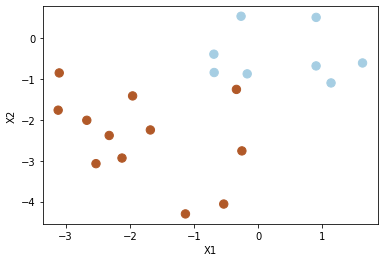

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

We fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost so that no observations are misclassified

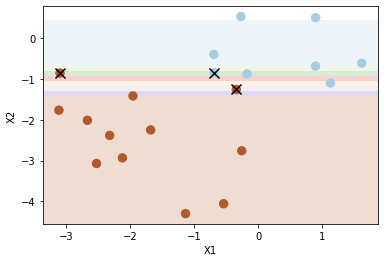

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear', probability=True) 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

We observe that the margin is very narrow and the number of SV required are 3

It seems likely that this model will perform poorly on test data.

Trying a smaller value of cost:

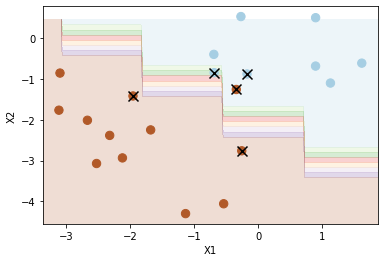

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear', probability=True) 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

We obtain a much wider margin and make use of 5 SVs

There's a much better possibility of getting better test accuracy

## Using Kernels in SVM

Text(0, 0.5, 'X2')

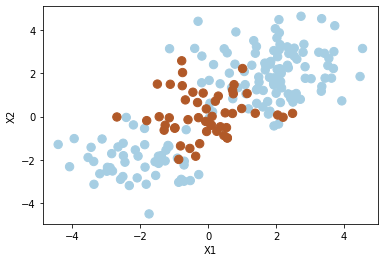

In [ ]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,random_state=1)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

Looking at the data distribution, we try using Radial kernel with γ=1

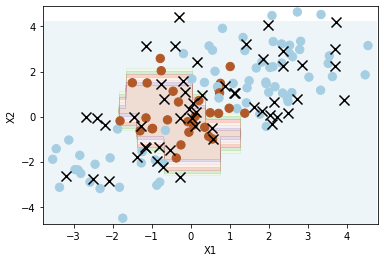

Number of support vectors:  57


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1, probability=True) 
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

If we increase the value of cost, we can reduce the number of training errors

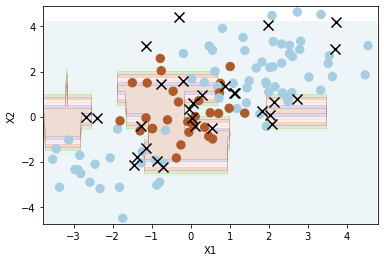

Number of support vectors:  30


In [ ]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0, probability=True) 
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

We see that there's now an irregular decision boundary that seems to be at risk of overfitting the data

We  perform cross-validation using GridSearchCV() to select the best choice of γ and cost for an SVM with a radial kerne

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
'gamma': [0.5, 1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='rbf', probability=True), tuned_parameters, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

{'C': 10, 'gamma': 4}

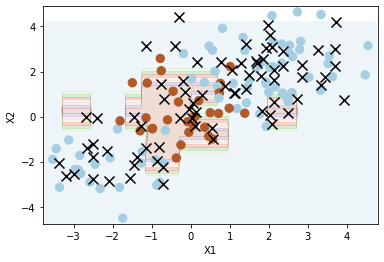

Number of support vectors:  77
Score: 0.82


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(f"Score: {clf.best_estimator_.score(X_test, y_test)}")

In [ ]:
print("Confusion Matrix")
with_kernel = confusion_matrix(y_test, clf.best_estimator_.predict(X_test))
pd.DataFrame(with_kernel, index=svc2.classes_, columns=svc2.classes_)

Confusion Matrix


,-1,1
-1,67,3
1,15,15


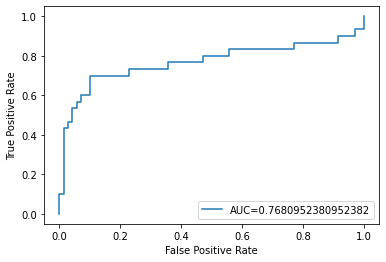

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# plot ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [3]:
df = pd.read_csv('/content/pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
